In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

## Functions

In [11]:
def split_column_names_by(this_df, include_dtypes:[list]=["int","float"]):
    # __author__ = "Roman Kaltschew"
    """takes in this_df, splits this_df's columns into two lists of column name by dtype of columns (default ["int","float"]) 
       and returns tuple (incl_lst, excl_lst)"""
    incl_lst = [_ for _ in this_df.select_dtypes(include=include_dtypes).dtypes.index]
    excl_lst = [_ for _ in this_df.select_dtypes(exclude=include_dtypes).dtypes.index]
    return (incl_lst, excl_lst)

In [153]:
def plot_hist_normalized(this_column):
    pt = PowerTransformer()
    col_transformed_pt=pt.fit_transform(this_column.to_numpy().reshape(-1,1))
    sns.displot(col_transformed_pt).set(title=f"{this_column.name} - PowerTransformer") 
    sc = StandardScaler()
    col_transformed_sc=sc.fit_transform(this_column.to_numpy().reshape(-1,1))
    sns.displot(col_transformed_sc).set(title=f"{this_column.name} - StandardScaler")
    qt = QuantileTransformer(n_quantiles=500, output_distribution="normal")
    col_transformed_qt=qt.fit_transform(this_column.to_numpy().reshape(-1,1))
    sns.displot(col_transformed_qt).set(title=f"{this_column.name} - QuantileTransformer")

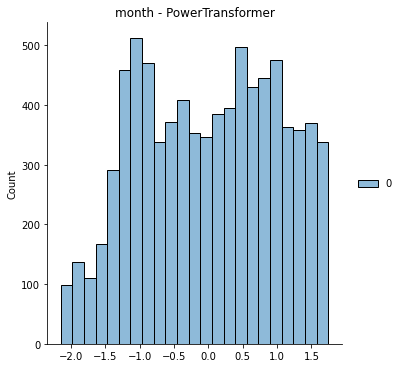

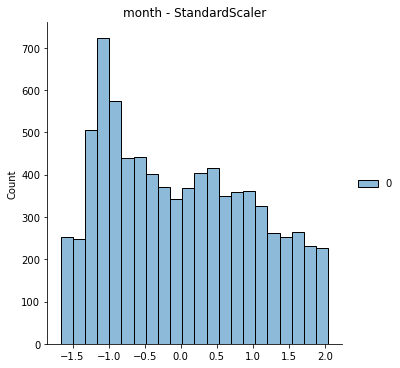

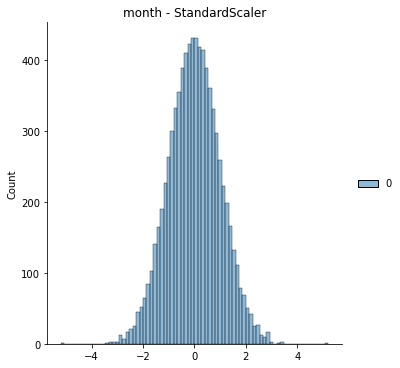

In [135]:
plot_hist_normalized(ca_no_zero_income_df["income"])

## Read and Clean

In [117]:
ca_df = pd.read_csv("C:/Users/roman/Documents/GitHub/Customer_Data_Analysis/Data/marketing_cust_analysis_round2.csv")
ca_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size', 'vehicle_type', 'month'],
      dtype='object')

In [ ]:
# # Plot boxplots for all numerical
# fig, ax = plt.subplots(figsize=(10,10))
# i = 1
# for col in split_column_names_by(ca_df)[0]:            
#     plt.subplot(3,3,i)
#     sns.boxplot(y=ca_df[col])
#     i += 1

## Normalizing

**dataframe with 0 income dropped**

In [118]:
ca_no_zero_income_df = ca_df[ca_df["income"] != 0]
# ca_no_zero_income_df

In [119]:
split_column_names_by(ca_no_zero_income_df)[0]

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'number_of_open_complaints',
 'number_of_policies',
 'total_claim_amount',
 'month']

number_of_open_complaints, number_of_policies changed to category

In [140]:
# ca_no_zero_income_df.loc[["number_of_open_complaints","number_of_policies"]] = ca_no_zero_income_df[["number_of_open_complaints","number_of_policies"]].astype('category')
for col in ["number_of_open_complaints","number_of_policies", "month"]:
    ca_no_zero_income_df[col] = ca_no_zero_income_df[col].astype('category')

C:\Users\roman\AppData\Local\Temp/ipykernel_22980/2178190001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ca_no_zero_income_df[col] = ca_no_zero_income_df[col].astype('category')


In [141]:
split_column_names_by(ca_no_zero_income_df)[0]

['customer_lifetime_value',
 'income',
 'monthly_premium_auto',
 'months_since_last_claim',
 'months_since_policy_inception',
 'total_claim_amount']

**X-y split**

In [175]:
X=ca_no_zero_income_df.drop("total_claim_amount", axis=1)
y=ca_no_zero_income_df["total_claim_amount"]

### different transformations

**Numerical**

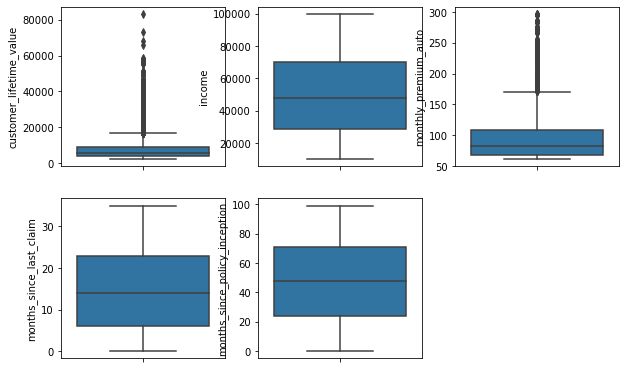

In [176]:
fig, ax = plt.subplots(figsize=(10,10))
i = 1
for col in split_column_names_by(X)[0]:            
    plt.subplot(3,3,i)
    sns.boxplot(y=X[col])
    i += 1

customer       state  customer_lifetime_value response  coverage  \
0      DK49336     Arizona              4809.216960       No     Basic   
2      LZ68649  Washington             14947.917300       No     Basic   
3      XL78013      Oregon             22332.439460      Yes  Extended   
4      QA50777      Oregon              9025.067525       No   Premium   
5      HO81102         NaN              4745.181764      NaN     Basic   
...        ...         ...                      ...      ...       ...   
10902  PP30874  California              3579.023825       No  Extended   
10903  SU71163     Arizona              2771.663013       No     Basic   
10906  KX53892      Oregon              5259.444853       No     Basic   
10907  TL39050     Arizona             23893.304100       No  Extended   
10908  WA60547  California             11971.977650       No   Premium   

                  education effective_to_date employmentstatus gender  income  \
0                   College           2/18/11         Employed      M   48029   
2                  Bachelor           2/10/11         Employed      M   22139   
3                   College           1/11/11         Employed      M   49078   
4                  Bachelor           1/17/11    Medical Leave      F   23675   
5      High School or Below           2/14/11         Employed      M   50549   
...                     ...               ...              ...    ...     ...   
10902  High School or Below           1/24/11         Employed      F   28304   
10903               College            1/7/11         Employed      M   59855   
10906               College            1/6/11         Employed      F   61146   
10907              Bachelor            2/6/11         Employed      F   39837   
10908               College           2/13/11         Employed      F   64195   

       ... number_of_open_complaints number_of_policies     policy_type  \
0      ...                       0.0                  9  Corporate Auto   
2      ...                       0.0                  2   Personal Auto   
3      ...                       0.0                  2  Corporate Auto   
4      ...                       NaN                  7   Personal Auto   
5      ...                       0.0                  7   Personal Auto   
...    ...                       ...                ...             ...   
10902  ...                       2.0                  1   Personal Auto   
10903  ...                       4.0                  1   Personal Auto   
10906  ...                       0.0                  6   Personal Auto   
10907  ...                       0.0                  2  Corporate Auto   
10908  ...                       4.0                  6   Personal Auto   

             policy  renew_offer_type sales_channel  vehicle_class  \
0      Corporate L3            Offer3         Agent  Four-Door Car   
2       Personal L3            Offer3   Call Center            SUV   
3      Corporate L3            Offer2        Branch  Four-Door Car   
4       Personal L2            Offer1        Branch  Four-Door Car   
5       Personal L3            Offer1         Agent  Four-Door Car   
...             ...               ...           ...            ...   
10902   Personal L2            Offer2         Agent  Four-Door Car   
10903   Personal L2            Offer2        Branch   Two-Door Car   
10906   Personal L3            Offer2        Branch  Four-Door Car   
10907  Corporate L3            Offer1           Web     Luxury SUV   
10908   Personal L1            Offer1        Branch            SUV   

      vehicle_size vehicle_type month  
0          Medsize          NaN     2  
2          Medsize            A     2  
3          Medsize            A     1  
4          Medsize          NaN     1  
5          Medsize            A     2  
...            ...          ...   ...  
10902      Medsize            A     1  
10903      Medsize            A     1  
10906      Medsize            A     1  
10

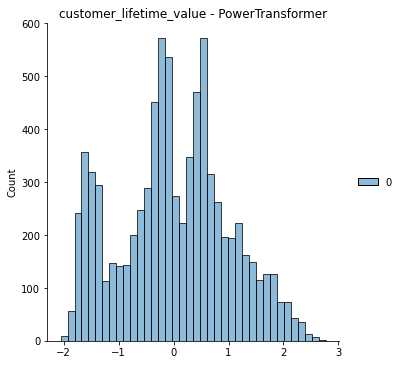

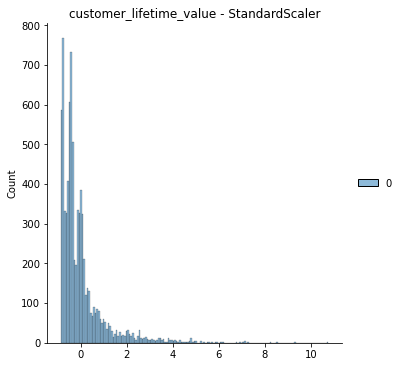

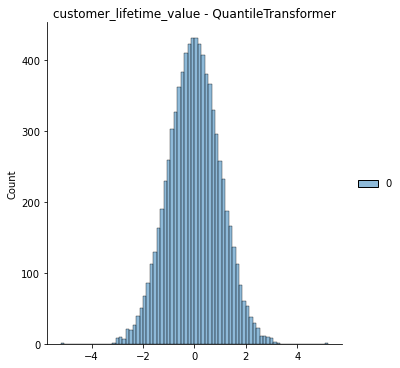

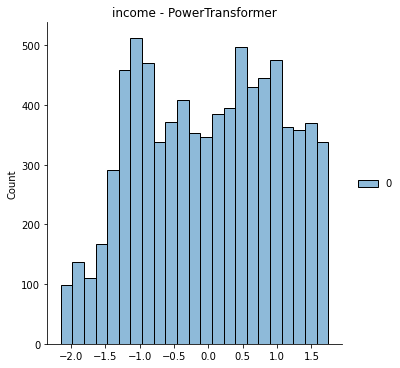

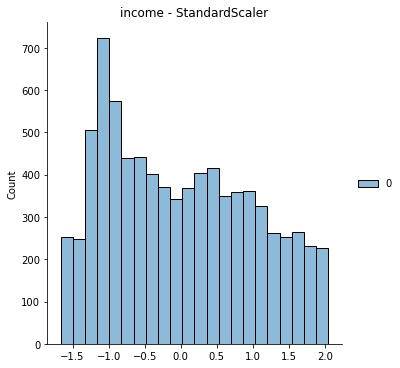

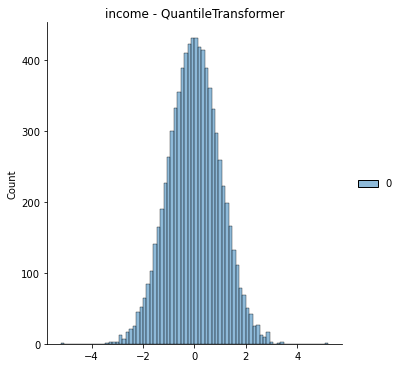

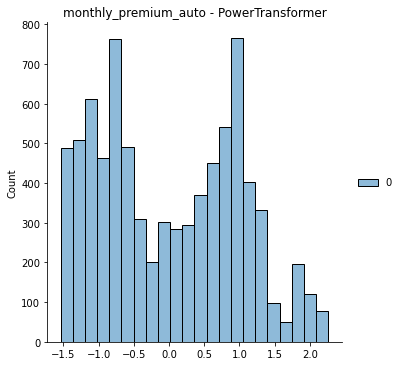

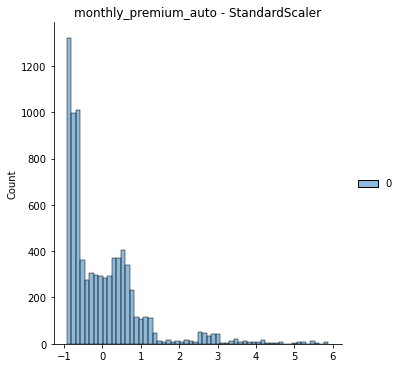

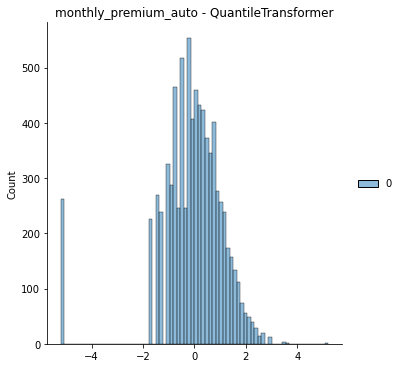

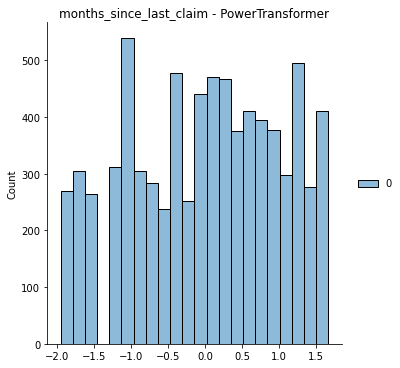

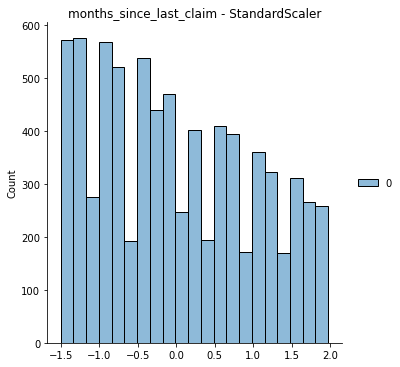

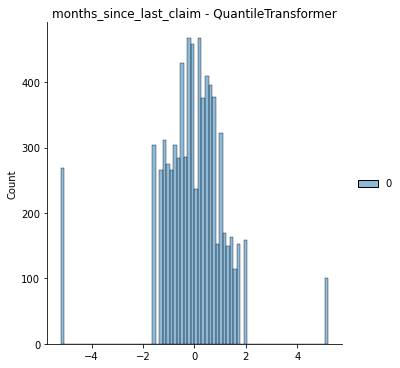

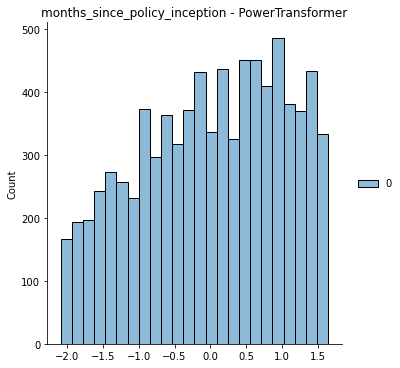

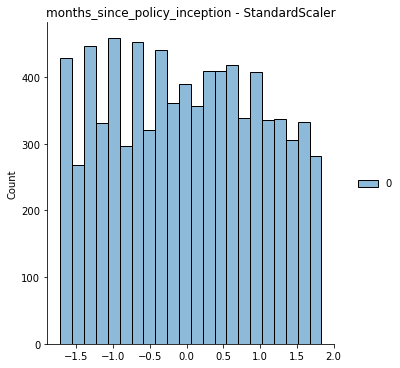

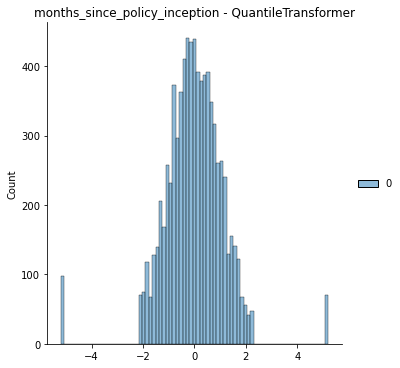

In [177]:
for col in split_column_names_by(X)[0]:
    plot_hist_normalized(X[col])

8123

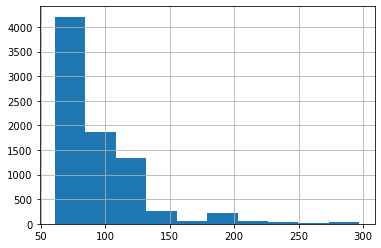

In [206]:
X["monthly_premium_auto"].hist()
len(X)

In [211]:
test_X = X[X["monthly_premium_auto"] < 150]

7673

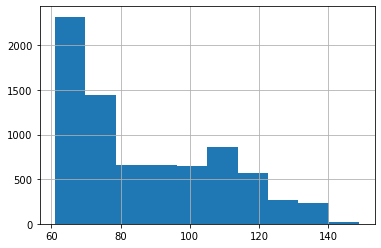

In [212]:
test_X["monthly_premium_auto"].hist()
len(test_X)

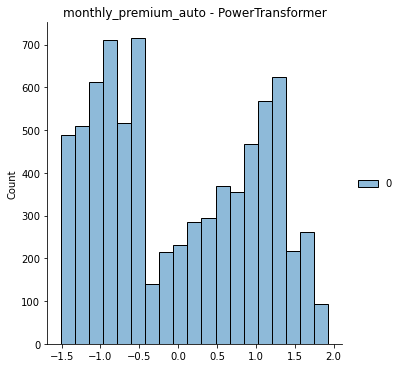

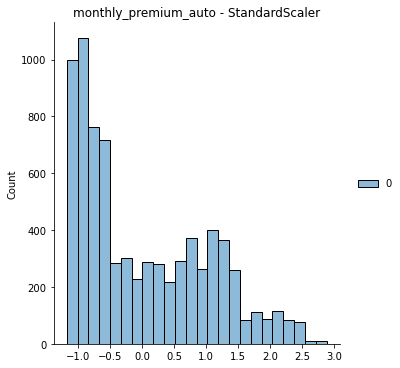

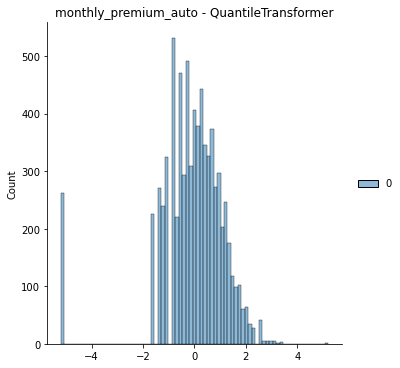

In [213]:
plot_hist_normalized(test_X["monthly_premium_auto"])

<AxesSubplot:>

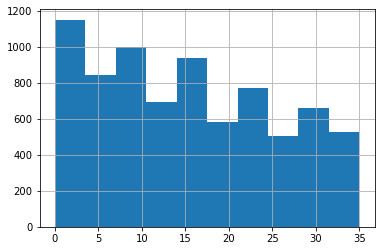

In [217]:
X["months_since_last_claim"].hist()

**Categorical**

In [219]:
split_column_names_by(X)[1]

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type',
 'month']

In [223]:
X["renew_offer_type"].value_counts()

Offer1    3019
Offer2    2832
Offer3    1301
Offer4     971
Name: renew_offer_type, dtype: int64

In [218]:
cat_col=pd.get_dummies(X["state"], drop_first=False)
cat_col

Arizona  California  Nevada  Oregon  Washington
0            1           0       0       0           0
2            0           0       0       0           1
3            0           0       0       1           0
4            0           0       0       1           0
5            0           0       0       0           0
...        ...         ...     ...     ...         ...
10902        0           1       0       0           0
10903        1           0       0       0           0
10906        0           0       0       1           0
10907        1           0       0       0           0
10908        0           1       0       0           0

[8123 rows x 5 columns]

In [232]:
# # get dummies pandas
# categoricals_features=pd.get_dummies(categoricals_features, drop_first=True)
# categoricals_features
pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categoricals_features).toarray())
##columns=OneHotEncoder(drop='first').fit(categoricals_features).get_feature_names(input_features=categoricals_feature##s.columns)).head()

0     1     2     3     4     5     6     7     8     9     ...  6906  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   1.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   1.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
8118   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
8119   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   1.0   
8120   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   1.0   
8121   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
8122   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   1.0   

      6907  6908  6909  6910  6911  6912  6913  6914  6915  
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  
1      1.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0  
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
8118   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  
8119   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0  
8120   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  
8121   0.0   1.0   0.0   1.0   0.0   0.0   0.0   1.0   0.0  
8122   0.0   0.0   0.0   0.0   1.0   0.0   0.0   1.0   0.0  

[8123 rows x 6916 columns]

In [226]:
categoricals_features= X.select_dtypes("object")
categoricals_features

customer       state response  coverage             education  \
0      DK49336     Arizona       No     Basic               College   
2      LZ68649  Washington       No     Basic              Bachelor   
3      XL78013      Oregon      Yes  Extended               College   
4      QA50777      Oregon       No   Premium              Bachelor   
5      HO81102         NaN      NaN     Basic  High School or Below   
...        ...         ...      ...       ...                   ...   
10902  PP30874  California       No  Extended  High School or Below   
10903  SU71163     Arizona       No     Basic               College   
10906  KX53892      Oregon       No     Basic               College   
10907  TL39050     Arizona       No  Extended              Bachelor   
10908  WA60547  California       No   Premium               College   

      effective_to_date employmentstatus gender location_code marital_status  \
0               2/18/11         Employed      M      Suburban        Married   
2               2/10/11         Employed      M      Suburban         Single   
3               1/11/11         Employed      M      Suburban         Single   
4               1/17/11    Medical Leave      F      Suburban        Married   
5               2/14/11         Employed      M      Suburban       Divorced   
...                 ...              ...    ...           ...            ...   
10902           1/24/11         Employed      F      Suburban        Married   
10903            1/7/11         Employed      M      Suburban        Married   
10906            1/6/11         Employed      F         Urban        Married   
10907            2/6/11         Employed      F         Rural        Married   
10908           2/13/11         Employed      F         Urban       Divorced   

          policy_type        policy renew_offer_type sales_channel  \
0      Corporate Auto  Corporate L3           Offer3         Agent   
2       Personal Auto   Personal L3           Offer3   Call Center   
3      Corporate Auto  Corporate L3           Offer2        Branch   
4       Personal Auto   Personal L2           Offer1        Branch   
5       Personal Auto   Personal L3           Offer1         Agent   
...               ...           ...              ...           ...   
10902   Personal Auto   Personal L2           Offer2         Agent   
10903   Personal Auto   Personal L2           Offer2        Branch   
10906   Personal Auto   Personal L3           Offer2        Branch   
10907  Corporate Auto  Corporate L3           Offer1           Web   
10908   Personal Auto   Personal L1           Offer1        Branch   

       vehicle_class vehicle_size vehicle_type  
0      Four-Door Car      Medsize          NaN  
2                SUV      Medsize            A  
3      Four-Door Car      Medsize            A  
4      Four-Door Car      Medsize          NaN  
5      Four-Door Car      Medsize            A  
...              ...          ...          ...  
10902  Four-Door Car      Medsize            A  
10903   Two-Door Car      Medsize            A  
10906  Four-Door Car      Medsize            A  
10907     Luxury SUV      Medsize          NaN  
10908            SUV      Medsize            A  

[8123 rows x 17 columns]

select some discrete columns

In [233]:
X = X[[
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'number_of_open_complaints',
 'number_of_policies',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type',
 ]]

In [234]:
categoricals_features= X.select_dtypes("object")
categoricals_features

state response  coverage             education effective_to_date  \
0         Arizona       No     Basic               College           2/18/11   
2      Washington       No     Basic              Bachelor           2/10/11   
3          Oregon      Yes  Extended               College           1/11/11   
4          Oregon       No   Premium              Bachelor           1/17/11   
5             NaN      NaN     Basic  High School or Below           2/14/11   
...           ...      ...       ...                   ...               ...   
10902  California       No  Extended  High School or Below           1/24/11   
10903     Arizona       No     Basic               College            1/7/11   
10906      Oregon       No     Basic               College            1/6/11   
10907     Arizona       No  Extended              Bachelor            2/6/11   
10908  California       No   Premium               College           2/13/11   

      employmentstatus gender location_code marital_status     policy_type  \
0             Employed      M      Suburban        Married  Corporate Auto   
2             Employed      M      Suburban         Single   Personal Auto   
3             Employed      M      Suburban         Single  Corporate Auto   
4        Medical Leave      F      Suburban        Married   Personal Auto   
5             Employed      M      Suburban       Divorced   Personal Auto   
...                ...    ...           ...            ...             ...   
10902         Employed      F      Suburban        Married   Personal Auto   
10903         Employed      M      Suburban        Married   Personal Auto   
10906         Employed      F         Urban        Married   Personal Auto   
10907         Employed      F         Rural        Married  Corporate Auto   
10908         Employed      F         Urban       Divorced   Personal Auto   

             policy renew_offer_type sales_channel  vehicle_class  \
0      Corporate L3           Offer3         Agent  Four-Door Car   
2       Personal L3           Offer3   Call Center            SUV   
3      Corporate L3           Offer2        Branch  Four-Door Car   
4       Personal L2           Offer1        Branch  Four-Door Car   
5       Personal L3           Offer1         Agent  Four-Door Car   
...             ...              ...           ...            ...   
10902   Personal L2           Offer2         Agent  Four-Door Car   
10903   Personal L2           Offer2        Branch   Two-Door Car   
10906   Personal L3           Offer2        Branch  Four-Door Car   
10907  Corporate L3           Offer1           Web     Luxury SUV   
10908   Personal L1           Offer1        Branch            SUV   

      vehicle_size vehicle_type  
0          Medsize          NaN  
2          Medsize            A  
3          Medsize            A  
4          Medsize          NaN  
5          Medsize            A  
...            ...          ...  
10902      Medsize            A  
10903      Medsize            A  
10906      Medsize            A  
10907      Medsize          NaN  
10908      Medsize            A  

[8123 rows x 16 columns]

In [235]:
pd.DataFrame(OneHotEncoder(drop='first').fit_transform(categoricals_features).toarray())


0    1    2    3    4    5    6    7    8    9    ...  95   96   97   \
0     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
1     0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  1.0   
2     0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  ...  0.0  0.0  0.0   
3     0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  0.0   
4     0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
8118  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
8119  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
8120  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  ...  0.0  0.0  0.0   
8121  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0   
8122  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  ...  0.0  0.0  1.0   

      98   99   100  101  102  103  104  
0     0.0  0.0  0.0  1.0  0.0  0.0  1.0  
1     0.0  0.0  0.0  1.0  0.0  0.0  0.0  
2     0.0  0.0  0.0  1.0  0.0  0.0  0.0  
3     0.0  0.0  0.0  1.0  0.0  0.0  1.0  
4     0.0  0.0  0.0  1.0  0.0  0.0  0.0  
...   ...  ...  ...  ...  ...  ...  ...  
8118  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
8119  0.0  1.0  0.0  1.0  0.0  0.0  0.0  
8120  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
8121  0.0  0.0  0.0  1.0  0.0  0.0  1.0  
8122  0.0  0.0  0.0  1.0  0.0  0.0  0.0  

[8123 rows x 105 columns]

In [78]:
# yj = PowerTransformer(method="yeo-johnson")
# no_zero_income_transformed_yj=pt.fit_transform(ca_no_zero_income_df["income"].to_numpy().reshape(-1,1))
# sns.displot(no_zero_income_transformed_yj)